In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [16]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.isnull().sum()
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
df.rename(columns={'Annual Income (k$)': 'AnnualIncome', 'Spending Score (1-100)': 'SpendingScore'},inplace=True)

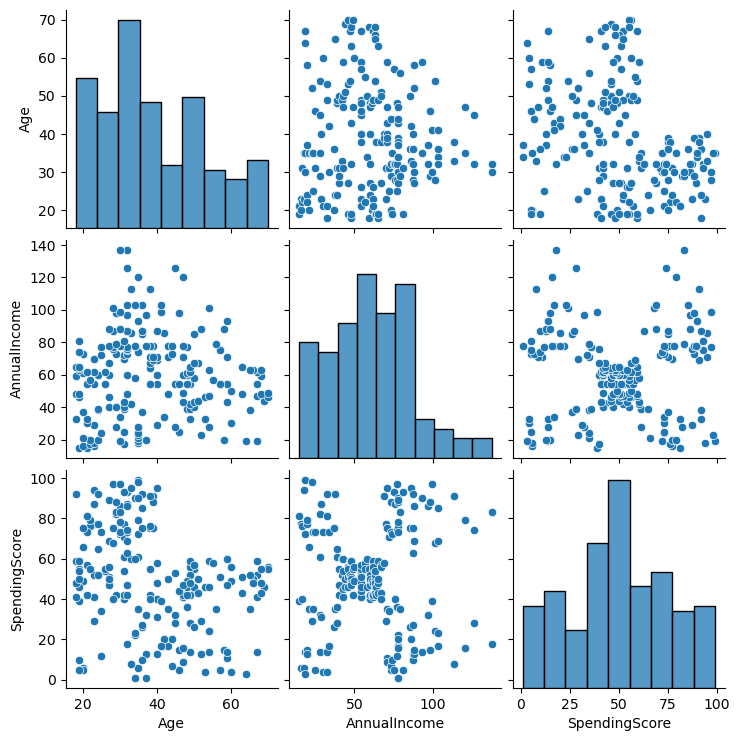

In [18]:
sns.pairplot(df[['Age','AnnualIncome','SpendingScore']])
plt.show()

TypeError: 'function' object is not subscriptable

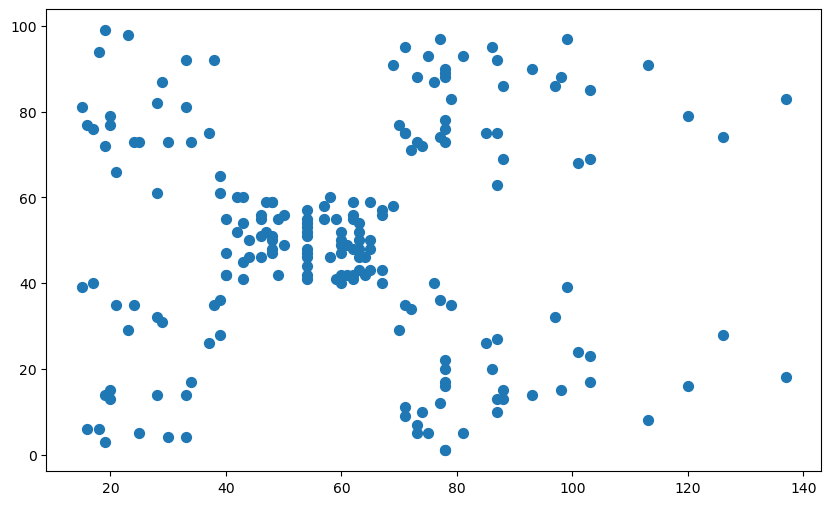

In [19]:
#scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['AnnualIncome'], df['SpendingScore'], s=50)
plt.xlabel['Annual Income']
plt.ylabel['Spending Score']
plt.title['Plot between Annual Income and spending Score']
plt.show()

In [20]:
#we need  to determine the optimal number of k clusters 
#within clusters sum of squares WCSS
X= df[['AnnualIncome', 'SpendingScore']]

wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    

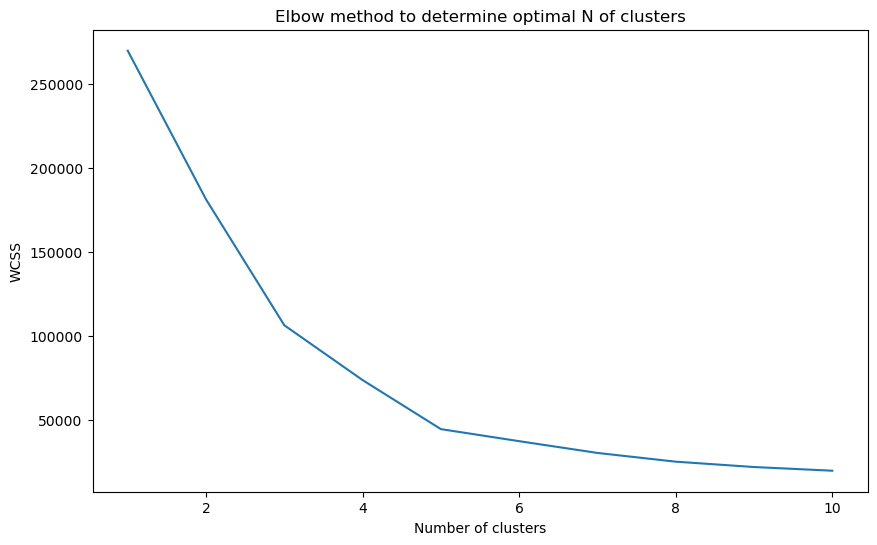

In [23]:
#we will now identify elbow point

plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow method to determine optimal N of clusters')
plt.show()

In [24]:
kmeans=KMeans(n_clusters=5, init='k-means++', max_iter=300,n_init=10,random_state=0)
y_kmeans= kmeans.fit_predict(X)

In [25]:
df['cluster']=y_kmeans

In [26]:
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


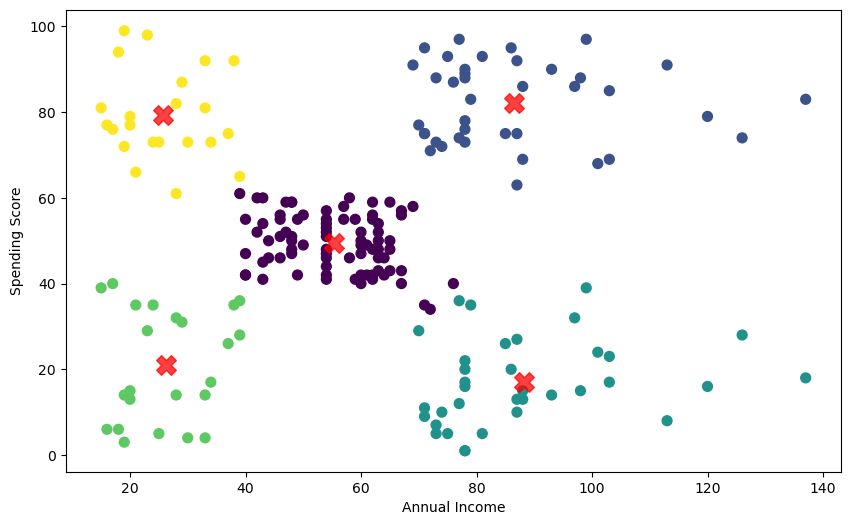

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_kmeans, s=50, cmap='viridis')
centers =kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [42]:
kmeans=KMeans(n_clusters=6, init='k-means++',max_iter=300,n_init=10, random_state=0)
df['ClusterAgeIncomeSpend']=y_kmeans

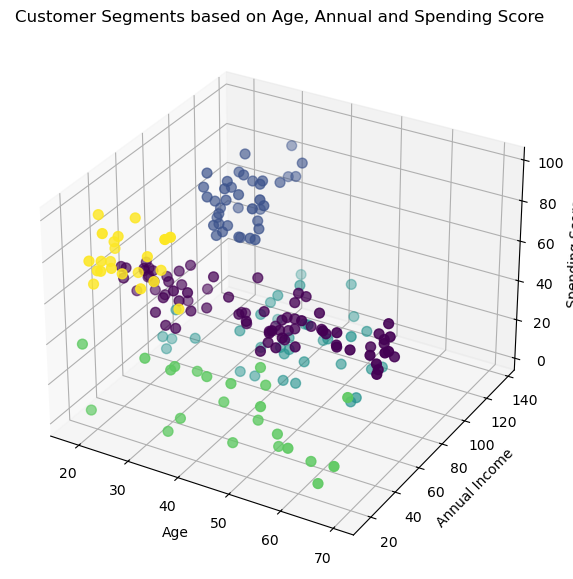

In [44]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,7))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['AnnualIncome'], df['SpendingScore'], c=df['ClusterAgeIncomeSpend'],s=50,cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title('Customer Segments based on Age, Annual and Spending Score')
plt.show()